In [1044]:
%load_ext autoreload
%autoreload 2

import compression as C



from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
ac3 = C.Util.load_data('ac3', -1)

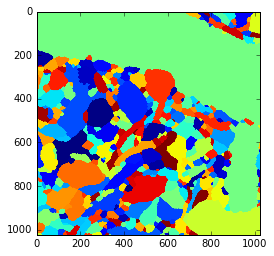

In [424]:
imshow(ac3[0])

In [1042]:
C.RLE.encode(ac3[0:1]).shape

(41113,)

In [849]:
i_shape, indices, delta_indices, data = C.SRLE.encode(ac3[0:1])

In [1037]:
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]

print 'shape', C.Util.get_size(C.LZMA.compress(i_shape, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'indices', C.Util.get_size(C.LZMA.compress(indices[:,:].copy(order='C'),format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'delta indices', C.Util.get_size(C.LZMA.compress(delta_indices,format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'data', C.Util.get_size(C.LZMA.compress(data))#,format=lzma.FORMAT_RAW, filters=LZMA_filters))

shape 16
indices 12599
delta indices 12988
data 5180


In [1039]:
data.shape

(1024, 38)

In [1040]:
1024*38

38912

In [1024]:
C.Util.get_size(C.Util.to_best_type(i_shape).copy())

102L

In [1029]:
C.Util.get_size(i_shape)

24

In [1027]:
len(i_shape.tobytes())

24

In [1031]:
C.Util.get_size(C.Util.to_best_type(i_shape))

6

In [1008]:
delta_indices_first_col = delta_indices[:,0]
print C.Util.get_size(C.LZMA.compress(delta_indices_first_col.copy(), format=lzma.FORMAT_RAW, filters=LZMA_filters))
delta_indices_rest = delta_indices[:,1:]
print C.Util.get_size(C.LZMA.compress(delta_indices_rest.copy(), format=lzma.FORMAT_RAW, filters=LZMA_filters))

1609
11056


In [1005]:
ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices_first_col)
print C.Util.get_size(C.LZMA.compress(ui8, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui16))
print C.Util.get_size(C.LZMA.compress(ui32))
print C.Util.get_size(C.LZMA.compress(ui64))

483
1289
69
69


In [994]:
ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices_rest)
print C.Util.get_size(C.LZMA.compress(ui8, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui16))
print C.Util.get_size(C.LZMA.compress(ui32))
print C.Util.get_size(C.LZMA.compress(ui64))

10411
337
69
69


In [1011]:
total_bytes = 0
delta_indices_first_col = delta_indices[:,0]
total_bytes += C.Util.get_size(C.LZMA.compress(delta_indices_first_col.copy(), format=lzma.FORMAT_RAW, filters=LZMA_filters))
delta_indices_rest = delta_indices[:,1:]
ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices_rest)
total_bytes += C.Util.get_size(C.LZMA.compress(ui8, format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui16))
#print C.Util.get_size(C.LZMA.compress(ui32))
#print C.Util.get_size(C.LZMA.compress(ui64))
print total_bytes

12357


In [1017]:
C.Util.get_size(C.LZMA.compress(C.Pack.encode(data)[1].copy()))

4069

In [981]:
C.Util.get_size(delta_indices_rest.copy())

75888L

In [982]:
C.Util.get_size(delta_indices.copy())

77936L

In [860]:
indices

array([[ 670,  723,  750, ...,    0,    0,    0],
       [ 671,  725,  751, ...,    0,    0,    0],
       [1015, 1024,    0, ...,    0,    0,    0],
       ..., 
       [ 569,  583,  603, ...,    0,    0,    0],
       [ 330,  331,  339, ...,    0,    0,    0],
       [ 218,  249,  251, ...,    0,    0,    0]], dtype=uint16)

In [861]:
C.Delta.encode(indices)

array([[ 670,   53,   27, ...,    0,    0,    0],
       [ 671,   54,   26, ...,    0,    0,    0],
       [1015,    9,    0, ...,    0,    0,    0],
       ..., 
       [ 569,   14,   20, ...,    0,    0,    0],
       [ 330,    1,    8, ...,    0,    0,    0],
       [ 218,   31,    2, ...,    0,    0,    0]], dtype=uint16)

In [863]:
C.Util.get_size(indices)
C.Util.get_size(C.Delta.encode(indices))

77936L

In [1032]:
C.Delta.encode(indices)

array([[ 670,   53,   27, ...,    0,    0,    0],
       [ 671,   54,   26, ...,    0,    0,    0],
       [1015,    9,    0, ...,    0,    0,    0],
       ..., 
       [ 569,   14,   20, ...,    0,    0,    0],
       [ 330,    1,    8, ...,    0,    0,    0],
       [ 218,   31,    2, ...,    0,    0,    0]], dtype=uint16)

In [909]:
print C.Util.get_size(indices), C.Util.get_size(C.LZMA.compress(indices,format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed = C.Pack.encode(indices, delimiter=1024)
print C.Util.get_size(packed[1]), C.Util.get_size(C.LZMA.compress(packed[1],format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed_decoded = C.Pack.decode(packed[0], packed[1], delimiter=1024)
print np.array_equal(indices, packed_decoded)

77936 12913
25166 11345
True


In [910]:
print C.Util.get_size(indices), C.Util.get_size(C.LZMA.compress(indices,format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed = C.Pack.encode(indices, delimiter=1024)
print C.Util.get_size(packed[1]), C.Util.get_size(C.LZMA.compress(packed[1],format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed_decoded = C.Pack.decode(packed[0], packed[1], delimiter=1024)
print np.array_equal(indices, packed_decoded)

77936 12636
25166 11417
True


In [926]:
print C.Util.get_size(delta_indices), C.Util.get_size(C.LZMA.compress(delta_indices,format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed = C.Pack.encode(delta_indices, delimiter=0)
print C.Util.get_size(packed[1]), C.Util.get_size(C.LZMA.compress(packed[1],format=lzma.FORMAT_RAW, filters=LZMA_filters))
packed_decoded = C.Pack.decode(packed[0], packed[1], delimiter=0)
print np.array_equal(delta_indices, packed_decoded)

77936 13025
27214 12099
True


In [933]:
delta_indices
delta_indices_first_col = delta_indices[:,0]
delta_indices_rest = delta_indices[:,1:]

In [934]:
C.Util.get_size(C.Util.to_best_type(delta_indices_rest))

75888L

In [941]:
C.Util.get_size(delta_indices_rest)

75888L

In [968]:
out, a16, a32, a64 = C.Extract.encode(delta_indices_rest)
restored_out = C.Extract.decode(out, a16, a32, a64)
np.array_equal(restored_out, delta_indices_rest)

True

In [962]:
C.Util.to_best_type(out)

255


array([[ 53,  27,   9, ...,   0,   0,   0],
       [ 54,  26,   9, ...,   0,   0,   0],
       [  9,   0,   0, ...,   0,   0,   0],
       ..., 
       [ 14,  20,  48, ...,   0,   0,   0],
       [  1,   8, 227, ...,   0,   0,   0],
       [ 31,   2,  46, ...,   0,   0,   0]], dtype=uint8)

In [960]:
out.max()

255

In [956]:
len(np.where(delta_indices_rest >= 256)[0])

282

In [946]:
delta_indices_rest.astype(np.uint8).tobytes()

'5\x1b\t#1AT\x16\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x006\x1a\t \x040@S\x17\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00/=R\x1b\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00/:P \x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00.7P#\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00.\x05\x02.N(\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x16\x143.L)\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [936]:
delta_indices_rest

array([[ 53,  27,   9, ...,   0,   0,   0],
       [ 54,  26,   9, ...,   0,   0,   0],
       [  9,   0,   0, ...,   0,   0,   0],
       ..., 
       [ 14,  20,  48, ...,   0,   0,   0],
       [  1,   8, 227, ...,   0,   0,   0],
       [ 31,   2,  46, ...,   0,   0,   0]], dtype=uint16)

In [939]:
delta_indices_rest

array([[ 53,  27,   9, ...,   0,   0,   0],
       [ 54,  26,   9, ...,   0,   0,   0],
       [  9,   0,   0, ...,   0,   0,   0],
       ..., 
       [ 14,  20,  48, ...,   0,   0,   0],
       [  1,   8, 227, ...,   0,   0,   0],
       [ 31,   2,  46, ...,   0,   0,   0]], dtype=uint16)

In [929]:
mh.fullhistogram(delta_indices_rest)[0:255]

array([26377,   331,   275,   231,   212,   202,   217,   202,   217,
         231,   239,   214,   213,   247,   209,   254,   241,   235,
         242,   263,   261,   225,   222,   211,   176,   205,   165,
         162,   182,   176,   160,   166,   142,   117,   126,   132,
         117,   104,   112,   110,   111,    94,    92,   102,    83,
          91,    90,    95,    93,    76,    71,    78,    65,    83,
          57,    46,    44,    44,    31,    42,    41,    36,    42,
          42,    33,    42,    48,    29,    45,    38,    39,    49,
          27,    36,    26,    25,    26,    25,    25,    19,    32,
          23,    23,    24,    17,    20,    18,    19,    14,    18,
          12,     9,    18,    17,    11,    16,    11,    22,    12,
          13,    17,    15,    10,    11,    12,    12,     9,    21,
          18,     9,     9,    10,    18,    21,    24,    30,    17,
          16,    25,    17,    14,    13,    15,    14,    16,    25,
          17,    15,

In [885]:
C.Util.get_size(C.LZMA.compress(C.Pack.encode(indices)[1]))

11557

In [873]:
indices[0,0:11]

array([ 670,  723,  750,  759,  794,  843,  908,  992, 1014, 1024,    0], dtype=uint16)

In [636]:
53+12557+4966

17576

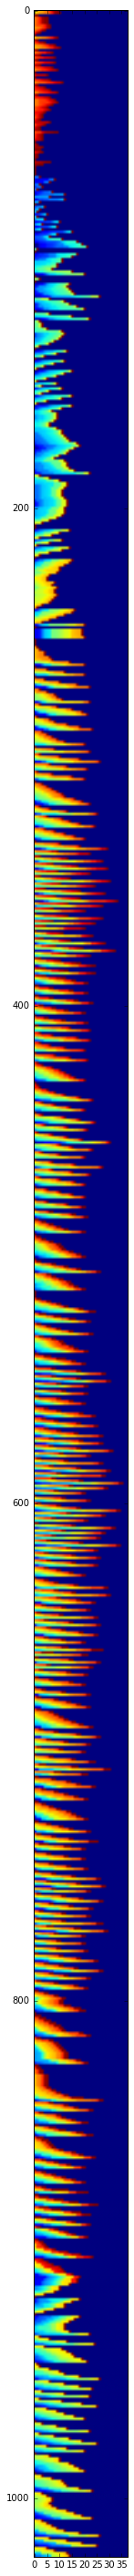

In [854]:
plt.figure(figsize=(10,50))
imshow(indices)

In [857]:
delta_indices[1,-30:]

array([83, 23, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint16)

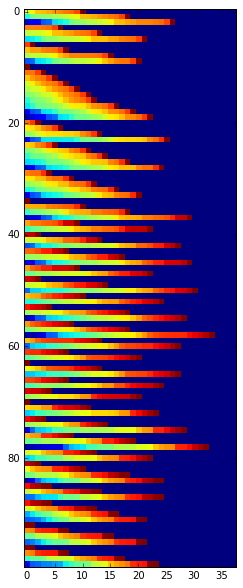

In [801]:
indices_swapped = np.swapaxes(indices, 0, 1)
plt.figure(figsize=(50,10))
imshow(indices[300:400], interpolation='nearest')
# rle_data_swapped = C.SRLE.encode(data)

0 0 (1, 38, 1024)
0 1 (1, 38, 1024)
0 2 (1, 38, 1024)
0 3 (1, 38, 1024)
0 4 (1, 38, 1024)
0 5 (1, 38, 1024)
0 6 (1, 38, 1024)
0 7 (1, 38, 1024)
0 8 (1, 38, 1024)
0 9 (1, 38, 1024)
0 10 (1, 38, 1024)
0 11 (1, 38, 1024)
0 12 (1, 38, 1024)
0 13 (1, 38, 1024)
0 14 (1, 38, 1024)
0 15 (1, 38, 1024)
0 16 (1, 38, 1024)
0 17 (1, 38, 1024)
0 18 (1, 38, 1024)
0 19 (1, 38, 1024)
0 20 (1, 38, 1024)
0 21 (1, 38, 1024)
0 22 (1, 38, 1024)
0 23 (1, 38, 1024)
0 24 (1, 38, 1024)
0 25 (1, 38, 1024)
0 26 (1, 38, 1024)
0 27 (1, 38, 1024)
0 28 (1, 38, 1024)
0 29 (1, 38, 1024)
0 30 (1, 38, 1024)
0 31 (1, 38, 1024)
0 32 (1, 38, 1024)
0 33 (1, 38, 1024)
0 34 (1, 38, 1024)
0 35 (1, 38, 1024)
0 36 (1, 38, 1024)
0 37 (1, 38, 1024)
1 1024 38


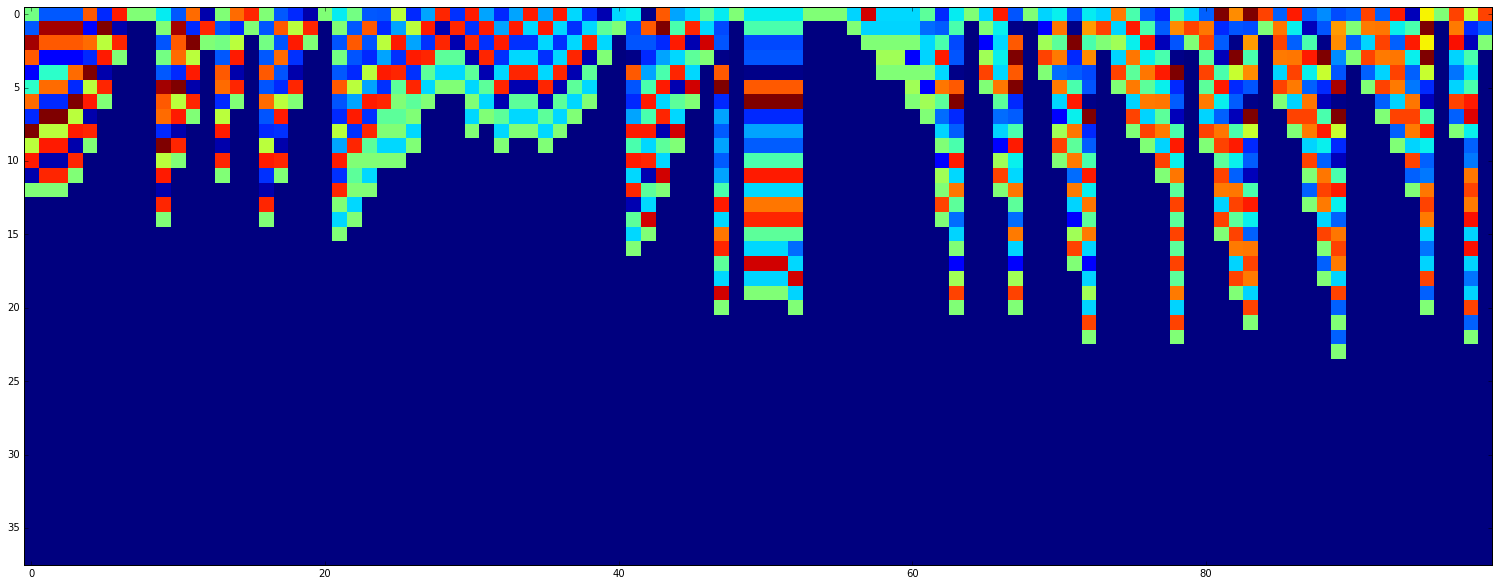

In [809]:

data_swapped = np.swapaxes(data, 0, 1)
plt.figure(figsize=(50,10))
imshow(data_swapped[:,200:300], interpolation='nearest')
data_swapped_3d = np.expand_dims(data_swapped,0)
rle_data_swapped = C.SRLE.encode(data_swapped_3d[0:1])

In [826]:
rle_data_swapped[2].shape

(38, 962)

In [825]:
C.Util.get_size(C.LZMA.compress(rle_data_swapped[3]))

1521

In [843]:
data_swapped[:,0:3]

array([[3036, 3036, 3822],
       [4381, 4381, 4458],
       [ 434,  434,    0],
       [1179, 1179,    0],
       [6112, 6112,    0],
       [2758, 1106,    0],
       [2255, 2758,    0],
       [ 654, 2255,    0],
       [3822,  654,    0],
       [4458, 3822,    0],
       [   0, 4458,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
 

In [839]:
rle_data_swapped[3][:,0:3]

array([[3822, 1106,  434],
       [1106,  434, 1106],
       [ 434, 1106, 2255],
       [1106, 2255, 3822],
       [2255, 3822, 3036],
       [3822, 3036,  654],
       [3036,  654, 2758],
       [ 654, 2758, 1021],
       [2758, 1021, 3036],
       [1021, 3036, 4492],
       [3036, 4492, 5217],
       [4492, 5217,  654],
       [5217,  654, 1106],
       [ 654, 1106, 4492],
       [1106, 4492, 1106],
       [4492, 1106,  654],
       [1106,  654, 1106],
       [ 654, 1106,  434],
       [1106,  434, 3822],
       [ 434, 3822,  654],
       [3822,  654, 3822],
       [ 654, 3822, 2758],
       [3822, 2758, 3036],
       [2758, 3036, 5076],
       [3036, 5076, 5043],
       [5076, 5043, 2758],
       [5043, 2758, 3036],
       [2758, 3036, 5076],
       [3036, 5076, 5043],
       [5076, 5043, 3036],
       [5043, 3036, 1019],
       [3036, 1019, 5278],
       [1019, 5278,  689],
       [5278,  689, 1433],
       [ 689, 1433, 5278],
       [1433, 5278, 5725],
       [5278, 5725, 5076],
 

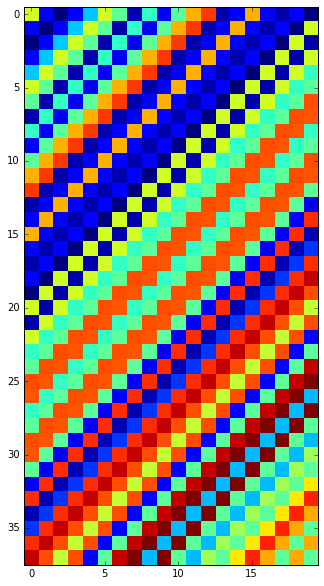

In [837]:
plt.figure(figsize=(30,10))
imshow(rle_data_swapped[3][:,0:20], interpolation='nearest')

In [828]:
C.Util.get_size(C.LZMA.compress(rle_data_swapped[2]))

349

In [784]:
plt.figure(figsize=(50,10))
imshow(rle_data_swapped[0,:,:], interpolation='nearest')

IndexError: too many indices for array

In [681]:
C.Util.get_size(C.LZMA.compress(ii[0],format=lzma.FORMAT_RAW, filters=my_filters))

LZMAError: Invalid or unsupported options

In [684]:
print C.Util.get_size(C.LZMA.compress(ii[0],format=lzma.FORMAT_RAW, filters=my_filters))
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(np.expand_dims(ii,0))))

74
15997


In [737]:
b = 0
for k in range(1):#ii.shape[0]):
    b += C.Util.get_size(C.BZ2.compress(data[0:6]))#,format=lzma.FORMAT_RAW, filters=my_filters))
b

137

In [721]:
6906+6043

12949

In [689]:
C.Util.get_size(C.LZMA.compress(ii,format=lzma.FORMAT_RAW, filters=my_filters))

12548

In [555]:
plt.figure(figsize=(10,30))
imshow(C.RLE.encode(indices))

IndexError: too many indices for array

In [498]:
indices[0:100]

array([[ 670,  723,  750, ...,    0,    0,    0],
       [ 671,  725,  751, ...,    0,    0,    0],
       [1015, 1024,    0, ...,    0,    0,    0],
       ..., 
       [1024,    0,    0, ...,    0,    0,    0],
       [  93,  132,  164, ...,    0,    0,    0],
       [ 132,  165,  167, ...,    0,    0,    0]], dtype=uint64)

In [514]:
C.Util.get_size(C.LZMA.compress(np.diff(np.diff(indices,axis=1),axis=0)))

20065

In [523]:
ii32 = np.iinfo(np.uint16(10))
ii32.max

65535

In [506]:
C.Util.get_size(C.LZMA.compress(indices))

13181

In [503]:
indices.shape

(1024, 38)

In [670]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0:1]),format=lzma.FORMAT_RAW, filters=my_filters))

15488

In [476]:
C.Util.get_size(C.LZMA.compress(ac3[0:1]))

28957

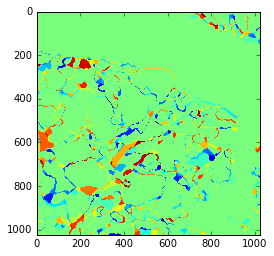

In [130]:
imshow(ac3_delta[4])

In [14]:
C.Util.get_size(ac3)

629145728L

In [42]:
cylinder = C.Util.load_data('cylinder', 10)

In [43]:
cylinder.shape

(300, 2048, 2048)

In [45]:
C.Util.get_size(cylinder)

9600L

In [ ]:
C.LZMA

In [6]:
compressed_ac3, time = C.Util.compress(C.LZMA, ac3)

In [8]:
o = C.Util.benchmark(C.LZMA, C.RLE, ac3, N=1)

Compression Method: LZMA
Encoding Method: RLE
Input Size: 16.777344 MB
Output Size: 0.029517 MB
Ratio: 569.105020353
Compression Speed [MB/s]: 41.1787898968
Decompression Speed [MB/s]: 5.81181443846
Encoding Speed [MB/s]: 185.740027421
Decoding Speed [MB/s]: 0.490976935671


In [38]:
diff = ac3[1].astype(np.int64) - ac3[0].astype(np.int64)

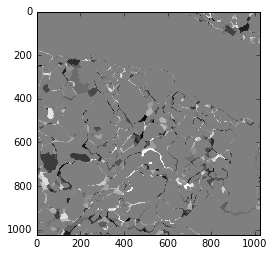

In [43]:
imshow(diff,cmap='gray')

0

In [33]:
ac3[1][350,200]

371

In [34]:
ac3[0][350,200]

1251

In [35]:
diff = np.zeros(ac3[0].shape, dtype=np.int64)

In [36]:
diff = ac3[1] - ac3[0]

In [48]:
import sys

In [49]:
sys.getsizeof(C.RLE.encode(ac3))

651464L

In [50]:
sys.getsizeof(ac3)

16777344L

In [51]:
ac3_delta = ac3.copy()

In [52]:
ac3_delta[1] = diff

In [61]:
sys.getsizeof(C.RLEA.encode(ac3_delta))

574465

In [62]:
sys.getsizeof(C.RLEA.encode(ac3))

407135

In [63]:
sys.getsizeof(C.LZMA.compress(C.RLEA.encode(ac3_delta)))

53681

In [68]:
sys.getsizeof(C.LZMA.compress(C.RLEA.encode(ac3)))

157889

In [65]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3_delta)))

48937

In [66]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3)))

29517

In [75]:
ac3_delta = ac3.copy().astype(np.int64)
for z in range(1,ac3.shape[0]):
    
    prev_slice = ac3[z-1]
    
    diff = ac3[z].astype(np.int64) - prev_slice.astype(np.int64)
    ac3_delta[z] = diff

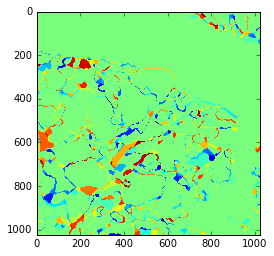

In [78]:
imshow(ac3_delta[4])

In [79]:
sys.getsizeof(C.LZMA.compress(ac3_delta))

512561

In [80]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3_delta)))

294701

In [81]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3)))

137201

In [ ]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3)))

In [82]:
sys.getsizeof(C.LZMA.compress(ac3_delta[1]))

54645

In [91]:
sys.getsizeof(C.LZMA.compress(ac3_delta[2].astype(np.uint64)))

54305

In [85]:
sys.getsizeof(C.LZMA.compress(ac3_delta[0]))

28957

In [90]:
ac3_delta[2].dtype

dtype('int64')

In [97]:
ac30 = ac3[0].copy()

for y in range(1,ac3.shape[1]):
    for x in range(1,ac3.shape[2]):
    
        ac30[y,x] = ac3[0,y,x] - ac3[0,y,x-1]
        

/home/d/nolearn/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in ulong_scalars


In [96]:
ac30[0]

array([3036,    0,    0, ...,    0,    0,    0], dtype=uint64)

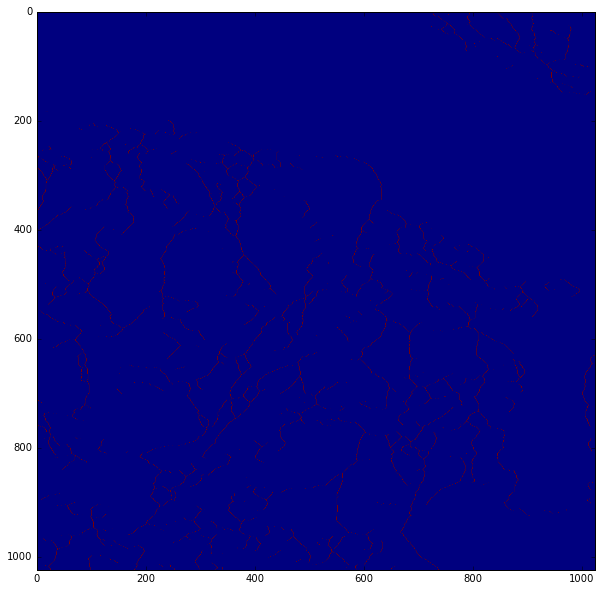

In [100]:
plt.figure(figsize=(10,10))
imshow(ac30)

In [104]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac30[0:1])))

IndexError: tuple index out of range

In [106]:
sys.getsizeof(C.BZ2.compress(ac3[0]))

29200

In [107]:
sys.getsizeof(C.BZ2.compress(ac30))

44160

In [110]:
sys.getsizeof(C.LZMA.compress(C.RLE.encode(ac3[0:1])))

15433

In [115]:
sys.getsizeof(C.LZMA.compress(ac302d))

34977

In [112]:
ac302d = np.zeros((1,1024,1024),dtype=np.uint64)

In [113]:
ac302d[0] = ac30

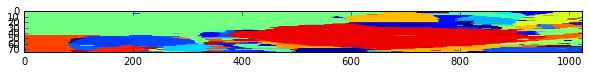

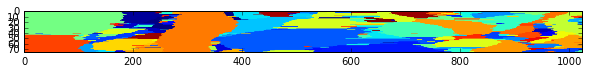

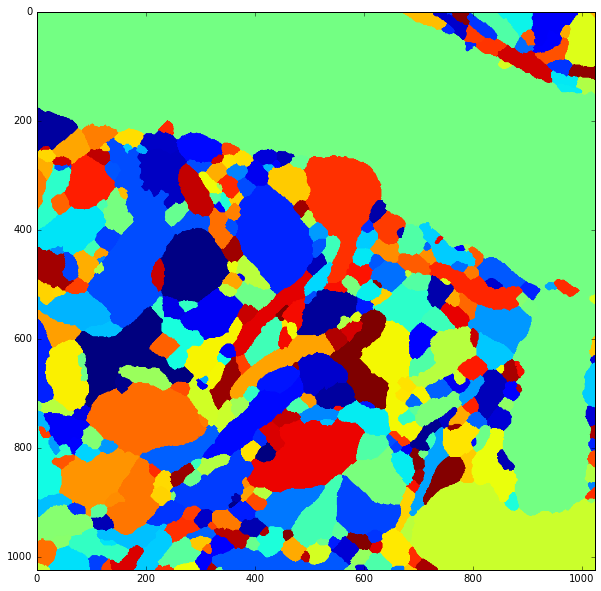

In [128]:
plt.figure(figsize=(10,10))
imshow(ac3[:,0,:])
plt.figure(figsize=(10,10))
imshow(ac3[:,:,0])
plt.figure(figsize=(10,10))
imshow(ac3[0,:,:])

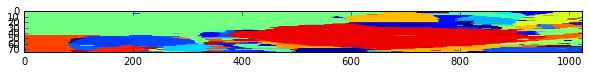

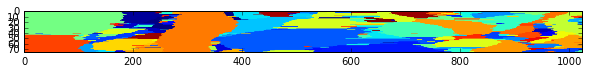

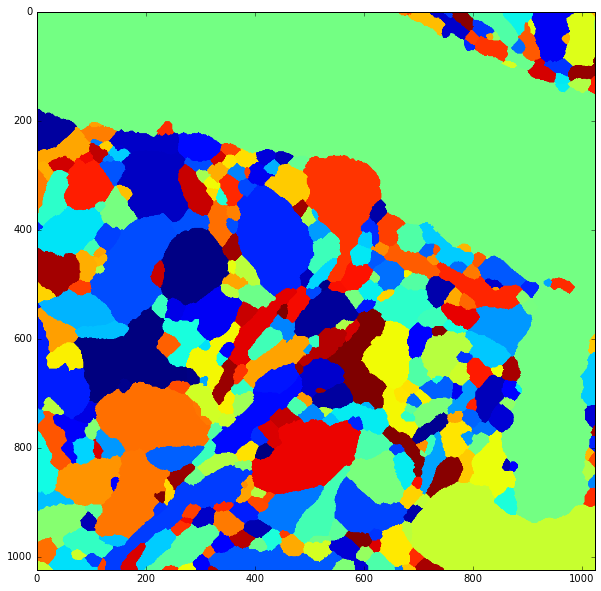

In [129]:
plt.figure(figsize=(10,10))
imshow(ac3[:,1,:])
plt.figure(figsize=(10,10))
imshow(ac3[:,:,1])
plt.figure(figsize=(10,10))
imshow(ac3[1,:,:])

In [118]:

ac3.reshape((ac3.shape[2],ac3.shape[1],ac3.shape[0])).shape

(1024, 1024, 10)

In [133]:
import mahotas as mh

In [161]:
borders = []
for z in range(1):#ac3.shape[0]):
    
    borders.append(mh.labeled.borders(ac3[z]))

In [162]:
sum_borders = borders[0].astype(np.int8)
for z in range(1,len(borders)):
    sum_borders += borders[z]

[autoreload of numpy.lib failed: Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name scimath
]
[autoreload of numpy.linalg failed: Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name _numpy_tester
]
[autoreload of numpy.testing.utils failed: Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: rand() requires a code object with 0 free vars, not 3
]
[autoreload of numpy.compat failed: Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/IPython/extensions/autore

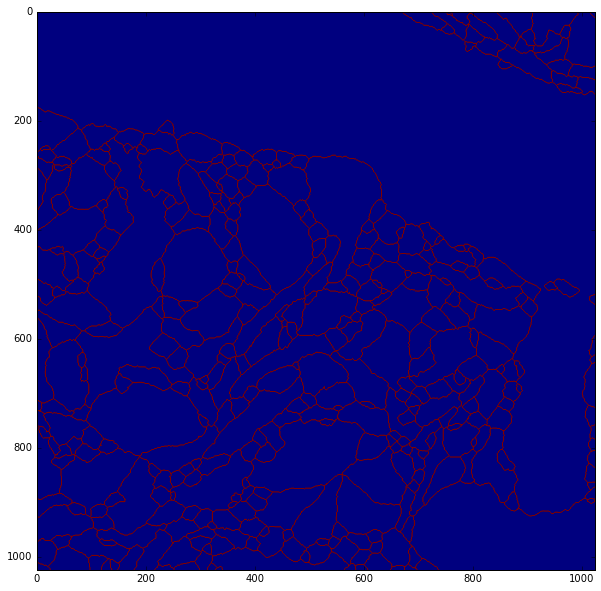

In [1043]:
plt.figure(figsize=(10,10))
imshow(sum_borders)

In [151]:
sum_borders.max()

2

In [144]:
ac3.max()

6184

In [152]:
mh.fullhistogram(sum_borders.astype(np.uint64))

array([956522,  81493,  10561], dtype=uint32)

In [147]:
3063+4112

7175

In [155]:
10561/81493.

0.12959395285484643

In [157]:
81493*8+81493

733437

In [170]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3)))

1013761

In [186]:
# RLE along Z
ac3_10 = np.zeros((1024,1,1024), dtype=ac3.dtype)
for z in range(ac3_10.shape[0]):
    ac3_10[z] = ac3[:,z,:]
C.Util.get_size(C.LZMA.compress(C.RLEA.encode(ac3_10)))

1117681

In [188]:
# RLEA along Z
ac3_10 = np.zeros((1024,1,1024), dtype=ac3.dtype)
for z in range(ac3_10.shape[0]):
    ac3_10[z] = ac3[:,z,:]
C.Util.get_size(C.LZMA.compress(C.RLEA.encode(ac3_10)))

1343685

In [192]:
# RLE along Z
ac3_10 = np.zeros((1024,1,1024), dtype=ac3.dtype)
for z in range(ac3_10.shape[0]):
    ac3_10[z] = ac3[:,:,z]
C.Util.get_size(C.LZMA.compress(C.RLEA.encode(ac3_10)))

1314341

In [174]:
ac3_10.shape

(1024, 75, 1024)

In [183]:
ac3_10[1000][73,:]

array([1184, 1184, 1184, ..., 3342, 3342, 3342], dtype=uint64)

In [198]:
C.RLE.encode(ac3[0:1])[0:20]

array([   1, 1024, 1024,  670, 3036,  722, 4381,  749,  434,  759, 1179,
        793, 6112,  843, 2758,  908, 2255,  993,  654, 1014], dtype=uint64)

In [208]:
C.RLE.encode(ac3[1:2])[3:np.where(C.RLE.encode(ac3[1:2])==1024)]

IndexError: invalid slice

In [209]:
rle_slice1 = C.RLE.encode(ac3[0:1])
rle_slice2 = C.RLE.encode(ac3[1:2])

In [212]:
rle_slice1[3:30]

array([ 670, 3036,  722, 4381,  749,  434,  759, 1179,  793, 6112,  843,
       2758,  908, 2255,  993,  654, 1014, 3822, 1024, 4458,  670, 3036,
        722, 4381,  749,  434,  759], dtype=uint64)

In [213]:
rle_slice2[3:30]

array([ 660, 3036,  678, 4744,  687, 5056,  717, 4381,  744,  434,  758,
       1179,  789, 6112,  851, 2758,  908, 2255,  985,  654,  994, 3822,
       1012, 3344, 1013, 3822, 1024], dtype=uint64)

In [269]:
slice1_prefix=rle_slice1[0]
slice1_width=rle_slice1[1]
slice1_height=rle_slice1[2]
data_offset = 3
# slice1, line1
slice1_line1 = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
print slice1_line1

[ 670 3036  722 4381  749  434  759 1179  793 6112  843 2758  908 2255  993
  654 1014 3822 1024 4458]


In [270]:
# slice1, line2
data_offset = data_offset + len(slice1_line1)
slice1_line2 = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
print slice1_line2

[ 670 3036  722 4381  749  434  759 1179  793 6112  843 2758  908 2255  993
  654 1014 3822 1024 4458]


In [271]:
# slice1, line3
data_offset = data_offset + len(slice1_line2)
slice1_line3 = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
print slice1_line3

[ 670 3036  723 4381  750  434  759 1179  794 6112  843 2758  908 2255  992
  654 1014 3822 1024 4458]


In [272]:
# slice1, line4
data_offset = data_offset + len(slice1_line3)
slice1_line4 = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
print slice1_line4

[ 670 3036  724 4381  750  434  759 1179  793 6112  844 2758  909 2255  992
  654 1014 3822 1024 4458]


In [273]:
# slice1, line5
data_offset = data_offset + len(slice1_line4)
slice1_line5 = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
print slice1_line5

[ 671 3036  725 4381  751  434  760 1179  792 6112  796 1106  844 2758  908
 2255  991  654 1014 3822 1024 4458]


In [299]:
max_length = 0
slice1_prefix=rle_slice1[0]
slice1_width=rle_slice1[1]
slice1_height=rle_slice1[2]
data_offset = 3
prev_row_length = 0
row_counter = 0
while row_counter < slice1_height:
    data_offset = data_offset + prev_row_length
    current_row = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
    prev_row_length = len(current_row)
    max_length = max(max_length, prev_row_length)
    #print row_counter,':', current_row
    row_counter += 1
    

In [300]:
# now we can store as a new compressed array
rle_slice1_compressed = np.zeros((row_counter, max_length), dtype=rle_slice1.dtype)
slice1_prefix=rle_slice1[0]
slice1_width=rle_slice1[1]
slice1_height=rle_slice1[2]
data_offset = 3
row_counter = 0
while row_counter < slice1_height:
    data_offset = data_offset + prev_row_length
    current_row = rle_slice1[data_offset:(np.where(rle_slice1[data_offset:]==slice1_width)[0]+data_offset)[0]+2]
    rle_slice1_compressed[row_counter,0:current_row.shape[0]] = current_row
    row_counter += 1

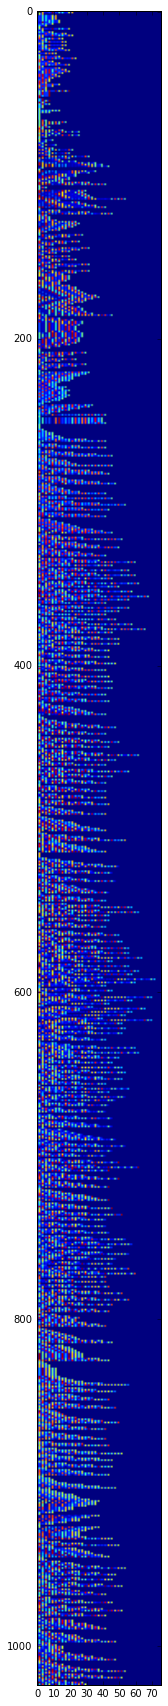

In [334]:
plt.figure(figsize=(10,30))
imshow(rle_slice1_compressed)

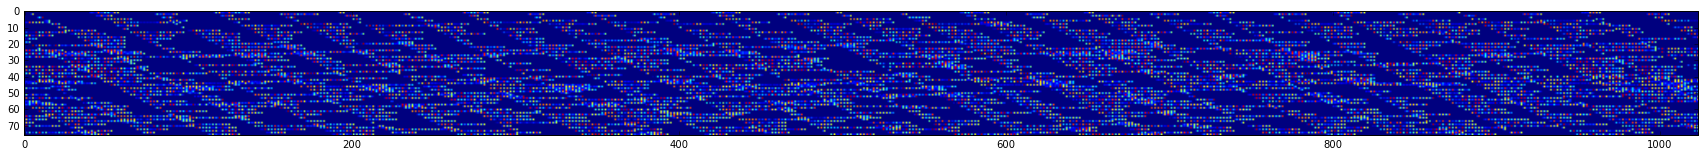

In [305]:
plt.figure(figsize=(30,10))

imshow(rle_slice1_compressed.reshape(rle_slice1_compressed.shape[1], rle_slice1_compressed.shape[0]))

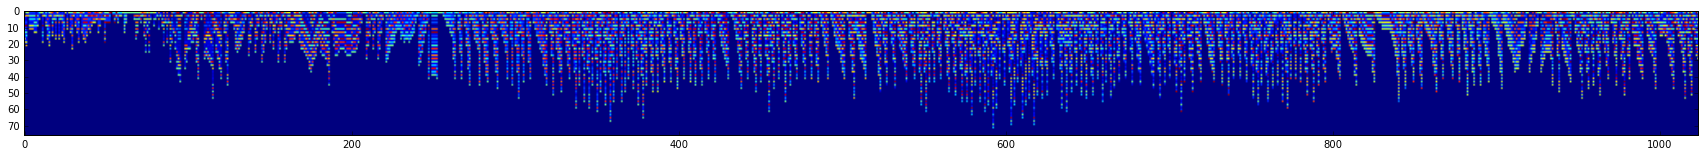

In [328]:
plt.figure(figsize=(30,10))
rle_slice1_compressed_3d = np.expand_dims(rle_slice1_compressed.swapaxes(1,0),0)

imshow(rle_slice1_compressed_3d[0])

In [409]:
rle_slice1_compressed

array([[ 670, 3036,  723, ...,    0,    0,    0],
       [ 671, 3036,  725, ...,    0,    0,    0],
       [1015, 3822, 1024, ...,    0,    0,    0],
       ..., 
       [ 569, 1326,  583, ...,    0,    0,    0],
       [ 330, 5917,  331, ...,    0,    0,    0],
       [ 218, 2025,  249, ...,    0,    0,    0]], dtype=uint64)

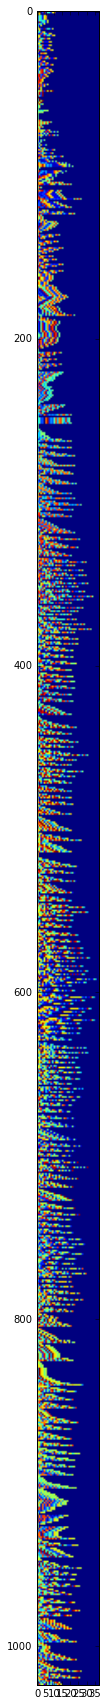

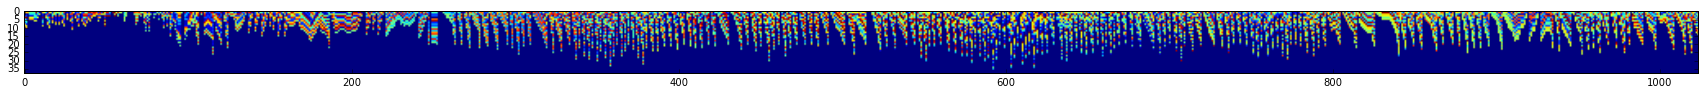

In [373]:
rle_slice1_compressed_label_ids = np.expand_dims(rle_slice1_compressed[:,1::2],0)
plt.figure(figsize=(10,30))
imshow(rle_slice1_compressed_label_ids[0])
plt.figure(figsize=(30,10))
imshow(rle_slice1_compressed_label_ids[0].swapaxes(0,1))

In [376]:
C.Util.get_size(C.LZMA.compress(rle_slice1_compressed_label_ids[0]))

ValueError: ndarray is not C-contiguous

In [388]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(np.rot90(rle_slice1_compressed_label_ids,3))))

9777

In [389]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(rle_slice1_compressed_label_ids)))

9709

In [387]:
C.Util.get_size(C.LZMA.compress(rle_slice1_compressed_label_ids[0].copy(order='C')))

5961

In [403]:
C.Util.get_size(rle_slice1_compressed[:,0::2]) + C.Util.get_size(C.LZMA.compress(rle_slice1_compressed_label_ids[0].copy(order='C')))

6073L

In [391]:
C.Util.get_size(np.expand_dims(rle_slice1_compressed[:,1::2],0))

128L

In [396]:
C.Util.get_size(rle_slice1_compressed)

622704L

In [408]:
C.Util.get_size(C.LZMA.compress(rle_slice1_compressed[:,0::2].copy(order='C')))

13181

In [401]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0:1])))

15433

In [404]:
rle_slice1_compressed[:,0::2]

array([[ 670,  723,  750, ...,    0,    0,    0],
       [ 671,  725,  751, ...,    0,    0,    0],
       [1015, 1024,    0, ...,    0,    0,    0],
       ..., 
       [ 569,  583,  603, ...,    0,    0,    0],
       [ 330,  331,  339, ...,    0,    0,    0],
       [ 218,  249,  251, ...,    0,    0,    0]], dtype=uint64)

In [405]:
rle_slice1_compressed_label_ids[0]

array([[3036, 4381,  434, ...,    0,    0,    0],
       [3036, 4381,  434, ...,    0,    0,    0],
       [3822, 4458,    0, ...,    0,    0,    0],
       ..., 
       [1326, 3141,  477, ...,    0,    0,    0],
       [5917, 1326, 2964, ...,    0,    0,    0],
       [2025, 5295, 2833, ...,    0,    0,    0]], dtype=uint64)

In [365]:
rle_slice1_compressed_label_ids_rle = C.RLE.encode(rle_slice1_compressed_label_ids.swapaxes(1,2))

In [ ]:
#print rle_slice1_compressed_3d.shape
rle_slice1_compressed_rle = C.RLE.encode(rle_slice1_compressed_3d)

In [366]:
len(rle_slice1_compressed_label_ids_rle)

32131

TypeError: Invalid dimensions for image data

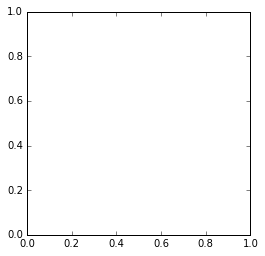

In [367]:
imshow(rle_slice1_compressed_label_ids.swapaxes(1,2))

In [346]:
rle_slice1_compressed[0:10]

array([[ 670, 3036,  723, 4381,  750,  434,  759, 1179,  794, 6112,  843,
        2758,  908, 2255,  992,  654, 1014, 3822, 1024, 4458,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 671, 3036,  725, 4381,  751,  434,  760, 1179,  792, 6112,  796,
        1106,  844, 2758,  908, 2255,  991,  654, 1014, 3822, 1024, 4458,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,

In [339]:
rle_slice1_compressed.shape[0] * rle_slice1_compressed.shape[1]

77824

In [341]:
C.Util.get_size(C.LZMA.compress(rle_slice1_compressed_rle))

41845

In [342]:
C.Util.get_size(C.LZMA.compress(rle_slice1_compressed))

15449

In [343]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0:1])))

15433

In [292]:
rle_slice1_compressed.shape

(0, 0)

In [279]:
slice1_height

1024

In [244]:
rle_slice1[len(slice1_line1):len(slice1_line1)+(np.where(rle_slice1[len(slice1_line1):]==1024)[0])[0]+2]

array([3822, 1024, 4458], dtype=uint64)

In [242]:
np.where(rle_slice1[3+len(slice1_line1):]==1024)[0]

array([   18,    38,    58, ..., 41008, 41048, 41088])

In [243]:
rle_slice1[3+len(slice1_line1):]

array([ 670, 3036,  722, ..., 5949, 1024, 3669], dtype=uint64)

In [233]:
1 + np.uint64(2)

3.0

In [420]:
C.Util.get_size(C.RLE.encode(ac3[0:1]))

41113


329000L

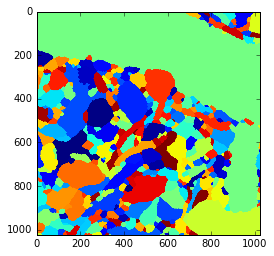

In [418]:
imshow(ac3[0])

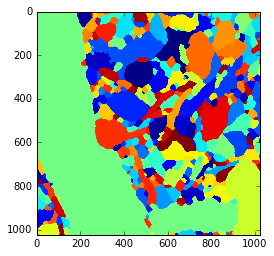

In [414]:
imshow(ac3[0:1].swapaxes(2,1)[0])

In [419]:
C.Util.get_size(C.RLE.encode(ac3[0:1].swapaxes(2,1)[0:1]))

42995


344056L